<a href="https://colab.research.google.com/github/ALL-Rodrigues/Topicos_Avancados/blob/main/Notebooks/Aula10_25_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decima Aula de Tópicos Avançados

## Novo Tópico:  Arvore de Decisão e sua Explicidade em machine learning


---
<br>

## Introdução ás arvores de decsão

**definição:** algoritimos de aprendizado supervisionado que particiona dados através de regras hierarquicas.
<br>

**Analogia:** similar a um fluxograma médico (diagnostico por etapas).
<br>

**Caracteristicas unica:** unico entre algoritimo de ml por sua trasnparencia.
<br>
<br>

**Componentes Princiais:**

*   Nó de decisão(testes condicionais)
*   Ramos (Caminhos das decisões)
*   Folhas (resultados finais)
<br>
<br>

## Anatomia de uma arvore de decisão

Estrutura detalhada:

*   No Raiz: Primeira pergunta/condição (EX. sexo == Feminino)
*   Nós Internos: subdivisões e subsequentes (Ex. Idades <= 30)
*   Folhas: Decisões finais (Ex. Sobreviveu == 87?)
<br>
<br>

## TREINO:

Ñ Supervisionado -> Eles não tem as especificações (Rotulos) de diagnostico e cabe a IA identificar se há o diagnostico ou não.

Supervisionado -> especifica os que tem o diagnostico compreovado e não comprovado.

---
<br>

## Vantagens da Explicabilidade

Transparencia Operacional:
* Cada Decisão pode ser rastreada passo-a-passo
* Fácil auditoria para compliance(Ex. sistemas de crédito)
<br>

Interpretação Humana:
* Regras equivalentes a linguagem natural
* Exemplo: Se passageiro é mulher na 1ª classe -> 92% de sobrevivência
---
<br>

## Aplicações Reais

* Finanças;
* Medicina;
* Marketing;
* Case Titanic;

---
<br>

## Metricas da divisão:

gini inquirity(padrão para classificação) entropia


**Formula de Impureza de Gini:**

Gini = 1 – somatória(p_i)²   onde p_i proporção da classe i
<br>
**Exemplos Númericos:**

Nó com 60% Sobreviveu e 40% Morreu:
Gini = 1 – (0.6² + 0.4²) = 0.48
<br>
**Ganho de Informação:**

Gain = Gini(parent) – [weighted avg x Gini(children)]
<br>
**Processo de Decisão:**

Calcular impureza para todas as features
Escolher a divisão com maior ganho
<br>

---
<br>

## Limitações e Boas Praticas

Problemas Comuns:

Overfiting (arvores profundas)
ivies em classes desbalanceadoas
instabilidades(pequenas variações nos dados geram arvores diferentes)

Soluções:

Podagrm (pruning) via:
max_depth
min_samples_leaf
uso de random ....

---

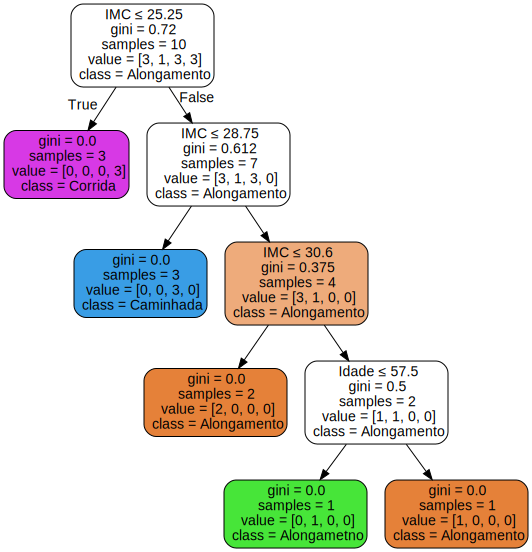

In [ ]:
# Código 01 - Decision_tree
# Instalar Bibliotecas (no Google Colab)
!pip install pandas scikit-learn graphviz

#Importa as bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Criar base de dados Maior (Exemplo Educativo)
data = {
    'Idade': [25, 40, 35, 50, 65, 20, 55, 60, 45, 30],
    'IMC': [22.0, 28.5, 26.0, 30.2, 29.0, 21.5, 31.0, 33.5, 27.8, 24.5],
    'Problema_Saude': ['não','Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não'],
    'Atividade': ['Corrida', 'Caminhada', 'Caminhada', 'Alongamento', 'Alongamento', 'Corrida', 'Alongametno', 'Alongamento', 'Caminhada', 'Corrida']
}

# Criar DataFrame
df = pd.DataFrame(data)

# Codificar coluna categórica 'Problema_Saude'
df['Saude_bin'] = df['Problema_Saude'].apply(lambda x: 1 if x == 'Sim' else 0)

# Selecionar atributos e alvo
X = df [['Idade', 'IMC', 'Saude_bin']]
y = df['Atividade']

# Criar e treinar a árvore
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X,y)

# Gerar DOT (Graphviz)
dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=['Idade', 'IMC', 'Problema_Saude'],
                           class_names=clf.classes_,
                           filled=True, rounded=True,
                           special_characters=True
)

# Visualizar com Graphviz
graph = graphviz.Source(dot_data)

#Exibe no colab
graph


## O que é K-NN (K-Nearest Neighbors)

K-NN (K-Vizinhos mais proximos) é um algoritimo simples de classificaçã o ou regresão que prediz mais proximos no conjuunto de treinamento

Funcionamento
* Clacula a distancia (Ex. Eucladiano) entre o novo dado e todos os outros.
* Seleciona os **K vizinhos mais Proximos**
* Para **Classiicação**: usa a classe mais frequênte entrer os k vizinhos
* Para **regessão**: usa a média dos valores dos k vizinhos


## Exemplo

Cafe: 3 pessoas
<br>
Chá: 2 Pessoas
<br>
k = 5

---
<br>
o dataset Iris é um conjinto de dados classicos em machirne learning e estatisticas, frequente...

## atributos

cada flor é descrita por 4 atributos numericos em centimetros

comprimetnto da sepala
largura de sepala
comprimento da sepala

---
<br>

#algoritimo

* Pass01: importar biblioteca e dados
* passo 2: dividir dados e, treino
* passo 3:
* passo 4:
* passo 5:


Acurácia: 0.7777777777777778


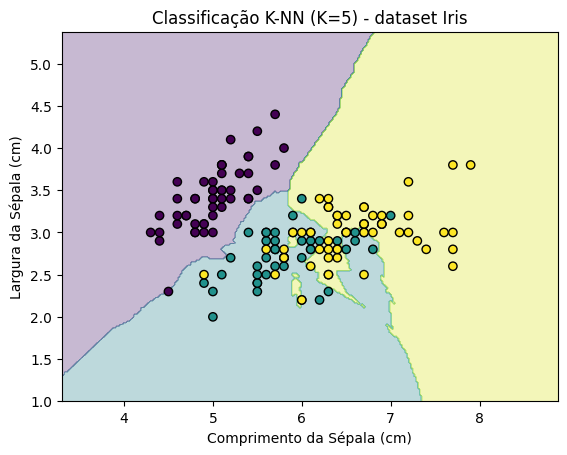

In [ ]:
# Código 02 - KNN

# Passo 1: importar
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data[:, :2] # usaremos apenas 2 fetures para visualização
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5) # k=5
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() +1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3) #0,3 não .03
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
plt.xlabel("Comprimento da Sépala (cm)")
plt.ylabel("Largura da Sépala (cm)")
plt.title('Classificação K-NN (K=5) - dataset Iris')
plt.show()




## relação com modelos

em uma relação linear (ex. y-a+bx)

x = variavel independente

y = variavel dependente


## CUIDADO

cuidados não antados

Fundamentos ml

regrssão linear em machirne learn

1 - teoria
<br>
1.1 - o que é regressão Linear?
...
<br>

1.2 - Pressupostos <br>

* 1. Linearidade:
* 2. Homocedasticidade:
* 3. Independencia:
* 4. Normalidade:

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


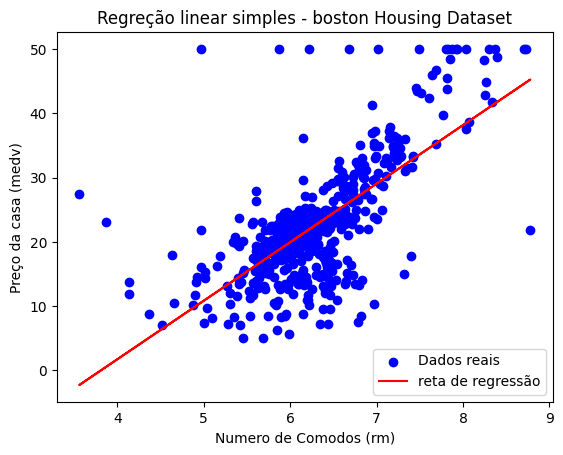

In [ ]:
# Código 03 - Regressao_linear

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # modelo de regressão

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

data = pd.read_csv(url)

print(data.head())
print(data.describe())

X = data[['rm']] # numero  medio de comodos - sempre em formato de tabela
y = data['medv'] # preço mediano da casa em milhares de dolares

modelo = LinearRegression() # cria o modelo
modelo.fit(X, y) # treina o modelo com dados rm e medv

print(f"Coeficiente angular (a): {modelo.coef_[0]:.2f}")
print(f"Intercapto (b): {modelo.intercept_:.2f}")

previsao = modelo.predict([[6]])

print(f"Previsão para 6 comodos: ${previsao[0]:.2f} mil" )

plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, modelo.predict(X), color='red', label='reta de regressão') # linha
plt.xlabel("Numero de Comodos (rm)")
plt.ylabel("Preço da casa (medv)")
plt.title("Regreção linear simples - boston Housing Dataset")
plt.legend()
plt.show()